## Calibrating the ZP of R and r images ##

The goal is to bootstrap the zeropoint of our R and r-band images using photometric catalogs from Pan-STARRS.

We are using a test images from Abell 1367 taken with the HDI camera on KPNO 0.9m telescope

* A1367_R.coadd.fits   
* A1367_ha12.coadd.fits

Ideally, we will also get the flux calibration for the Halpha image.

If the data were taken through the Johnson R filter, we will need to covert the Pan-STARRS r magnitudes to R according to the following equation:

$$ R-r   =  (-0.153 ± 0.003)(r-i) - (0.117 \pm 0.003) $$

or 

$$ R   =  r + (-0.153 ± 0.003)(r-i) - (0.117 \pm 0.003) $$

http://www.sdss3.org/dr8/algorithms/sdssUBVRITransform.php#Jordi2006


### Basic Steps For Program getphozp.py ###

* Run Source Extractor on image to measure magnitudes
* Read in Source Extractor catalog
* get max/min RA and DEC for the image
* get Pan-STARRS catalog over the same region
* match Pan-STARRS1 data to Source Extractor sources
* remove any objects that are saturated or non-linear in our r-band image
* Solve for the zeropoint



In [1]:
import os
from astropy.io import fits
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [107]:
%run ~/github/Virgo/programs/getphotzp.py --image A1367_R.coadd.fits --instrument h

0.36634553773116535


//anaconda/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in greater
  return getattr(self.data, op)(other)
//anaconda/envs/py36/lib/python3.6/site-packages/astropy/table/column.py:965: RuntimeWarning: invalid value encountered in less
  return getattr(self.data, op)(other)


<Figure size 432x288 with 0 Axes>

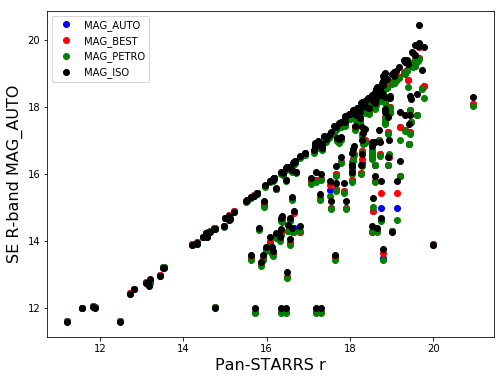

In [58]:
# investigating different SE magnitudes
# going to use MAG_AUTO
# I also throw out any objects with FLAGS
# this also shows the data before I make a bunch of cuts on magnitude, etc.
plt.figure(figsize=(8,6))
plt.plot(pan['rmag'][matchflag],matchedarray1['MAG_AUTO'][matchflag],'bo',label='MAG_AUTO')
plt.plot(pan['rmag'][matchflag],matchedarray1['MAG_BEST'][matchflag],'ro',label='MAG_BEST')
plt.plot(pan['rmag'][matchflag],matchedarray1['MAG_PETRO'][matchflag],'go',label='MAG_PETRO')
plt.plot(pan['rmag'][matchflag],matchedarray1['MAG_ISO'][matchflag],'ko',label='MAG_ISO')
plt.xlabel('Pan-STARRS r',fontsize=16)
plt.ylabel('SE R-band MAG_AUTO',fontsize=16)
plt.legend()

Text(0,0.5,'SE CLASS_STAR')

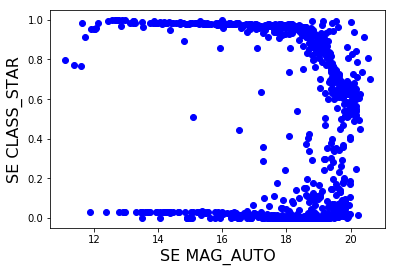

In [109]:
# looking at star-galaxy classifying
# going to keep only sources with CLASS_STAR > .95
plt.figure()
plt.plot(secat['MAG_AUTO'],secat['CLASS_STAR'],'bo')
plt.xlabel('SE MAG_AUTO',fontsize=16)
plt.ylabel('SE CLASS_STAR',fontsize=16)

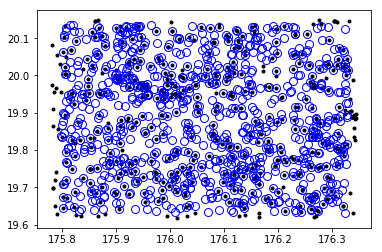

In [96]:
# checking to make sure Pan-STARRS catalog overlaps the same region
# of the sky as the data
plt.figure()
plt.plot(pan['RAJ2000'],pan['DEJ2000'],'k.')
plt.plot(secat['ALPHA_J2000'],secat['DELTA_J2000'],'bo',mfc='none',markersize=8)
#searcharea = plt.Circle((centerRA,centerDEC),radius=radius)
#plt.gca().add_artist(searcharea)


[ 0.99629637 -0.29533204]
number of points retained =  --
[ 1.00224413 -0.22678435]
0.0 -0.2267843476371612
number of points retained =  78
[ 1.00861376 -0.31839969]
-0.2267843476371612 -0.3183996943271566
number of points retained =  73
[ 1.00790826 -0.30333823]
-0.3183996943271566 -0.3033382293891406
number of points retained =  66
[ 1.00733267 -0.29149696]
-0.3033382293891406 -0.2914969645740772
number of points retained =  62
[ 1.00681956 -0.28329677]
-0.2914969645740772 -0.2832967712782528
number of points retained =  61
[ 1.00714586 -0.2880387 ]
-0.2832967712782528 -0.2880387016135367
number of points retained =  61
[ 1.00714586 -0.2880387 ]
-0.2880387016135367 -0.2880387016135367


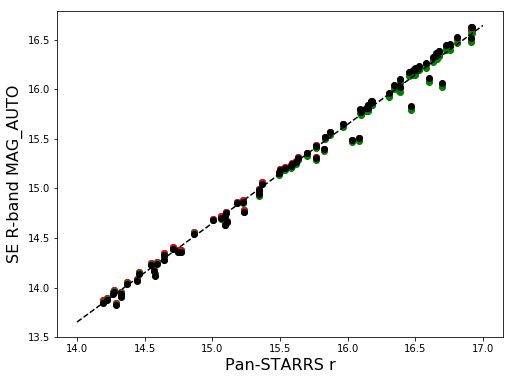

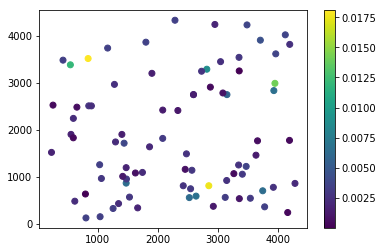

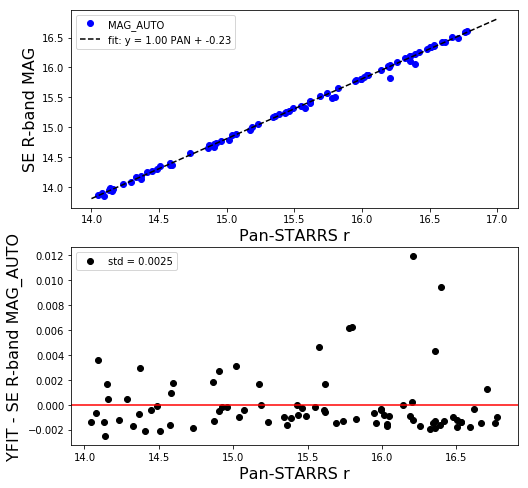

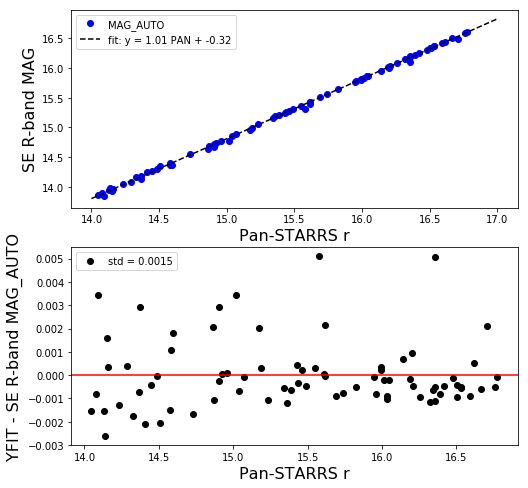

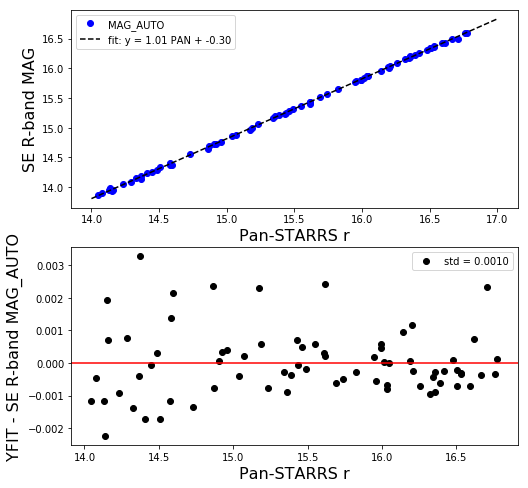

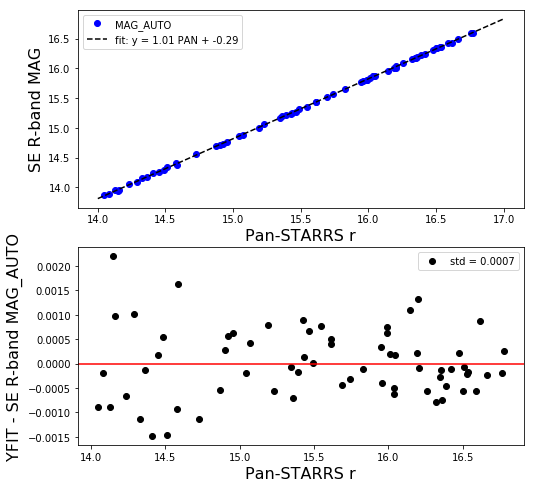

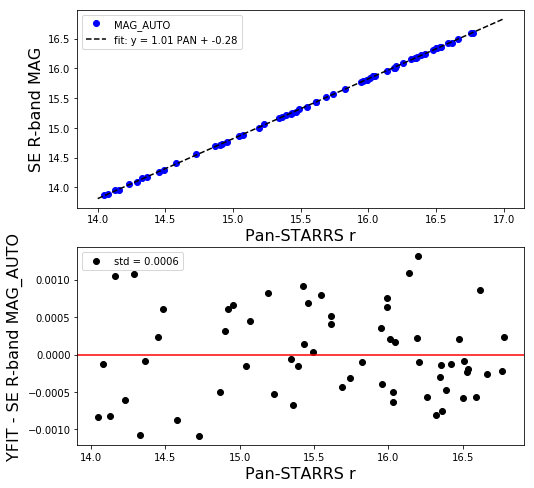

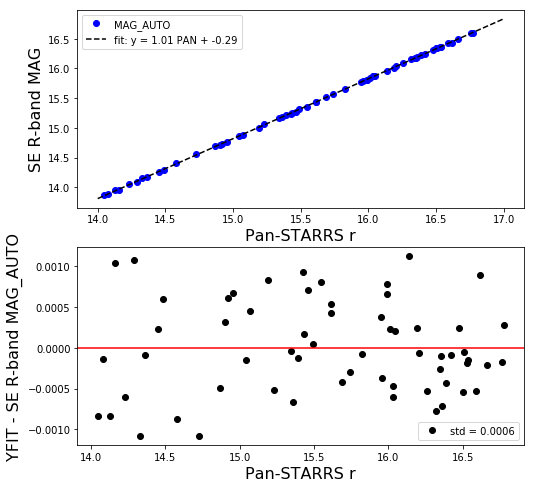

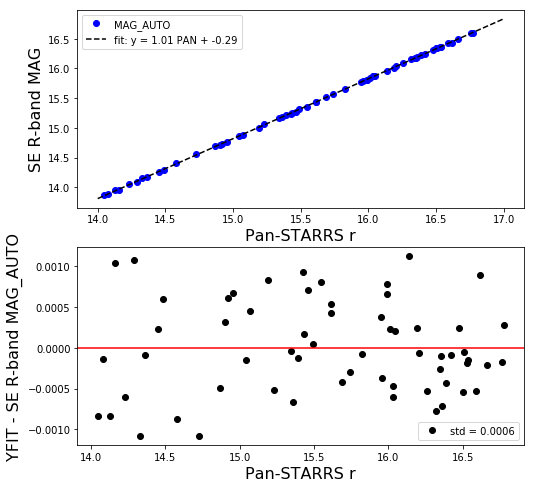

In [108]:
# using 2 sigma for iterative clipping
# when fitting linear relation to SE vs Pan-STARRS mag.
# resulting fits look good.
x,y = fitzp()